In [49]:
out_dir = '/Users/cu135/Dropbox (Partners HealthCare)/studies/review_pyper/figures/mansucript_figures/100_manuscript_questions/ROCs'

In [50]:
csv_path = '/Users/cu135/Dropbox (Partners HealthCare)/studies/review_pyper/metadata/metrics.csv'

Create Your Own Data PRN

In [ ]:
import pandas as pd

data = {
    'Frontal Lobe': {'CSF': 0.07, 'Surface': 0.04, 'GM': 0.2, 'WM': 0.27, 'Radiologist': 0.22},
    'Parietal Lobe': {'CSF': 0.12, 'Surface': 0.03, 'GM': 0.16, 'WM': 0.22, 'Radiologist': 0.02},
    'Occipital Lobe': {'CSF': 0.28, 'Surface': 0.11, 'GM': 0.24, 'WM': 0.13, 'Radiologist': 0.22},
    'Temporal Lobe': {'CSF': 0.31, 'Surface': 0.22, 'GM': 0.26, 'WM': 0.15, 'Radiologist': 0.2},
    'Mesial Temporal Lobe': {'CSF': 0.35, 'Surface': 0.0, 'GM': 0.48, 'WM': 0.27, 'Radiologist': 0.25},
    'Cerebellum': {'CSF': 0.07, 'Surface': 0.01, 'GM': 0.21, 'WM': 0.17, 'Radiologist': -0.04},
    'Ventriculomegaly': {'CSF': 0.22, 'Surface': 0.00, 'GM': 0.05, 'WM': 0.29, 'Radiologist': 0.32},
}
df = pd.DataFrame(data)
df


In [61]:
import pandas as pd
df = pd.read_csv(csv_path)
# df = df[df['Region'] != 'All']
# df = df.loc[:15, :]
# df = df.loc[:, ~df.columns.str.contains(' P')]
df

,Variable,Inference_Range,Inference,Sensitivity,Specificity,Precision,PPV,NPV,Accuracy,F1 Score
0,Not Amnesia Case,Local,Data in Document,0.857143,1.000000,1.000000,1.000000,0.125000,0.86,0.923077
1,Confounding Disease,Medical,Diagnostic Inference,0.833333,0.136364,0.116279,0.116279,0.857143,0.22,0.204082
2,Insufficient Physical Exam,Local,Data in Document,0.905263,0.400000,0.966292,0.966292,0.181818,0.88,0.934783
3,Memory Deficit Unmeasured,Local,Data in Document,0.965116,0.642857,0.943182,0.943182,0.750000,0.92,0.954023
4,Due to Global Cognitive Damage,Medical,Diagnostic Inference,1.000000,0.024691,0.193878,0.193878,1.000000,0.21,0.324786
5,No Neuroimaging,Local,Data in Document,0.989796,1.000000,1.000000,1.000000,0.666667,0.99,0.994872
6,Due to Neurodegeneration,Medical,Diagnostic Inference,1.000000,0.032258,0.072165,0.072165,1.000000,0.10,0.134615
7,Atypical Amnesia,Medical,Diagnostic Inference,0.714286,0.182796,0.061728,0.061728,0.894737,0.22,0.113636
8,Not in English,Local,Data in Document,1.000000,1.000000,1.000000,1.000000,1.000000,1.00,1.000000
9,Bias,Case,Case Quality Inference,0.090909,0.641026,0.066667,0.066667,0.714286,0.52,0.076923


Simple Bar Plot

In [63]:
import os
import seaborn as sns
import matplotlib.pyplot as plt

def plot_barplots(df, x_col, y_col, hue=None, palette="tab10"):
    ax = sns.barplot(data=df, x=x_col, y=y_col, hue=hue, palette=palette)
    return ax 
    
def plot_point_as_diamond(df, ax, point_col, palette="tab10"):
    x_coords = [p.get_x() + 0.5 * p.get_width() for p in ax.patches]
    plt.scatter(x=x_coords, y=df[point_col], color='k', marker='D', facecolors='none')
    
def plot_error_bars(df, ax, err_col, palette="tab10"):
    x_coords = [p.get_x() + 0.5 * p.get_width() for p in ax.patches]
    y_coords = [p.get_height() for p in ax.patches]
    ax.errorbar(x=x_coords, y=y_coords, yerr=df[err_col], capsize=6, fmt="none", c="k")

def show_and_save_plot(out_dir=None):
    if out_dir is not None:
        plt.savefig(os.path.join(out_dir, 'barplot.svg'))
    plt.show()

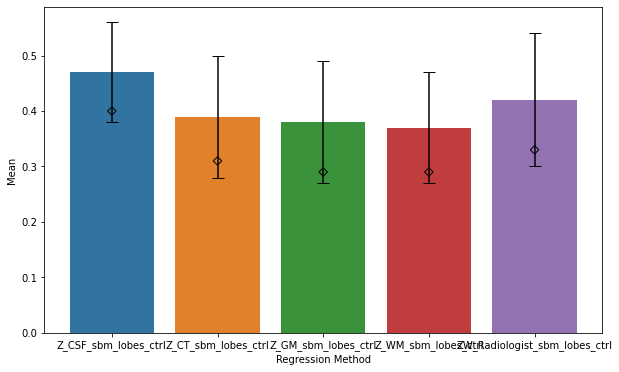

In [65]:
# Call the plotting functions
plt.figure(figsize=(10,6))
ax = plot_barplots(df, 'Regression Method', 'Mean')
plot_error_bars(df=df, ax=ax, err_col='Std')
plot_point_as_diamond(df=df, ax=ax, point_col='Point R-squared')
show_and_save_plot(out_dir)

Create Barplot Of Methods Within Groups
- The groups to compare within are the top level keys of the dictionary. 
- The groups to compare across are the second-level keys

In [17]:
df

,Variable,Inference_Range,Inference,Sensitivity,Specificity,Precision,PPV,NPV,Accuracy,F1 Score
0,Not Amnesia Case,Local,Data in Document,0.857143,1.000000,1.000000,1.000000,0.125000,0.86,0.923077
1,Confounding Disease,Medical,Diagnostic Inference,0.833333,0.136364,0.116279,0.116279,0.857143,0.22,0.204082
2,Insufficient Physical Exam,Local,Data in Document,0.905263,0.400000,0.966292,0.966292,0.181818,0.88,0.934783
3,Memory Deficit Unmeasured,Local,Data in Document,0.965116,0.642857,0.943182,0.943182,0.750000,0.92,0.954023
4,Due to Global Cognitive Damage,Medical,Diagnostic Inference,1.000000,0.024691,0.193878,0.193878,1.000000,0.21,0.324786
5,No Neuroimaging,Local,Data in Document,0.989796,1.000000,1.000000,1.000000,0.666667,0.99,0.994872
6,Due to Neurodegeneration,Medical,Diagnostic Inference,1.000000,0.032258,0.072165,0.072165,1.000000,0.10,0.134615
7,Atypical Amnesia,Medical,Diagnostic Inference,0.714286,0.182796,0.061728,0.061728,0.894737,0.22,0.113636
8,Not in English,Local,Data in Document,1.000000,1.000000,1.000000,1.000000,1.000000,1.00,1.000000
9,Bias,Case,Case Quality Inference,0.090909,0.641026,0.066667,0.066667,0.714286,0.52,0.076923


In [77]:
import pandas as pd

def melt_dataframe(df):
    # Melt the DataFrame
    melted_df = pd.melt(df, id_vars=['Method'], var_name='Variable', value_name='Accuracy')
    
    # Extract the region names from the 'Region' column
    melted_df['Region'] = melted_df['Region'].str.split(' ', expand=True)[0]
    
    return melted_df

melted_df = melt_dataframe(df)
melted_df

,Method,Region,R-Squared
0,ZCSF_removed_age-sex,Cerebellum,0.17
1,Zsurf_removed_age-sex,Cerebellum,0.00
2,ZGM_removed_age-sex,Cerebellum,0.35
3,ZWM_removed_age-sex,Cerebellum,0.24
4,Zrad_removed_age-sex,Cerebellum,-0.01
5,ZCSF_removed_age-sex,MTL,0.44
6,Zsurf_removed_age-sex,MTL,0.24
7,ZGM_removed_age-sex,MTL,0.59
8,ZWM_removed_age-sex,MTL,0.39
9,Zrad_removed_age-sex,MTL,0.28


FileNotFoundError: [Errno 2] No such file or directory: '/Users/cu135/Dropbox (Partners HealthCare)/studies/atrophy_seeds_2023/Figures/correlation_to_baseline_scores_controlled/barplot.svg'

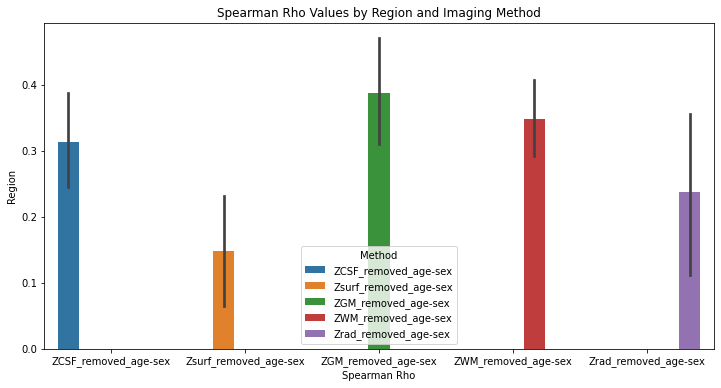

In [78]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os


# Create the bar plot
plt.figure(figsize=(12, 6))
sns.set_palette("tab10")
sns.barplot(x='Method', y='R-Squared', hue='Method', data=melted_df)

# Customizing the plot
# plt.xlim(-0.25, 1)
plt.title('Spearman Rho Values by Region and Imaging Method')
plt.ylabel('Region')
plt.xlabel('Spearman Rho')
output_file_path = os.path.join(out_dir, 'barplot.svg')
plt.savefig(output_file_path, format='svg')
# Show the plot
plt.show()

Swap Grouping

In [54]:
df


,Variable,Inference_Range,Inference,Sensitivity,Specificity,Precision,PPV,NPV,Accuracy,F1 Score
0,Not Amnesia Case,Local,Data in Document,0.857143,1.000000,1.000000,1.000000,0.125000,0.86,0.923077
1,Confounding Disease,Medical,Diagnostic Inference,0.833333,0.136364,0.116279,0.116279,0.857143,0.22,0.204082
2,Insufficient Physical Exam,Local,Data in Document,0.905263,0.400000,0.966292,0.966292,0.181818,0.88,0.934783
3,Memory Deficit Unmeasured,Local,Data in Document,0.965116,0.642857,0.943182,0.943182,0.750000,0.92,0.954023
4,Due to Global Cognitive Damage,Medical,Diagnostic Inference,1.000000,0.024691,0.193878,0.193878,1.000000,0.21,0.324786
5,No Neuroimaging,Local,Data in Document,0.989796,1.000000,1.000000,1.000000,0.666667,0.99,0.994872
6,Due to Neurodegeneration,Medical,Diagnostic Inference,1.000000,0.032258,0.072165,0.072165,1.000000,0.10,0.134615
7,Atypical Amnesia,Medical,Diagnostic Inference,0.714286,0.182796,0.061728,0.061728,0.894737,0.22,0.113636
8,Not in English,Local,Data in Document,1.000000,1.000000,1.000000,1.000000,1.000000,1.00,1.000000
9,Bias,Case,Case Quality Inference,0.090909,0.641026,0.066667,0.066667,0.714286,0.52,0.076923


In [8]:
# Transpose the data to swap grouping
df = pd.DataFrame(df).T.melt(var_name='Inference', value_name='Accuracy', ignore_index=False).reset_index()


# Generate Grouped Barplot

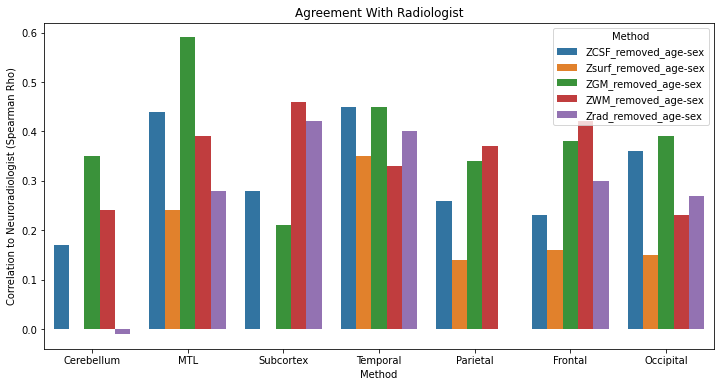

In [79]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
out_dir = '/Users/cu135/Dropbox (Partners HealthCare)/studies/atrophy_seeds_2023/Figures/correlation_to_baseline_scores_controlled'

# Create the bar plot with swapped grouping
plt.figure(figsize=(12, 6))
sns.set_palette("tab10")
sns.barplot(x='Region', y='R-Squared', hue='Method', data=melted_df)

# Customizing the plot
# plt.ylim(-0.3, 0.8)  # Adjust the y-axis limits as needed
plt.title('Agreement With Radiologist')
plt.xlabel('Method')
plt.ylabel('Correlation to Neuroradiologist (Spearman Rho)')

# Save the plot as an SVG file
output_file_path = os.path.join(out_dir, 'barplot.svg')
# plt.savefig(output_file_path, format='svg')

# Show the plot (optional)
plt.show()


# Generate Boxplot

In [66]:
# df.drop(13, inplace=True)
# df.drop(17, inplace=True)
# df.drop(14, inplace=True)


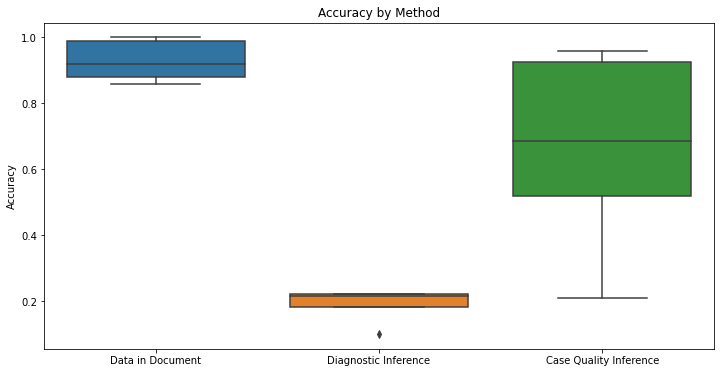

In [68]:
# df = pd.DataFrame(df).T.melt(var_name='Imaging Method', value_name='R-Squared', ignore_index=False).reset_index()
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
# Create the bar plot with swapped grouping
plt.figure(figsize=(12, 6))
sns.set_palette("tab10")
sns.boxplot(x='Inference', y='Accuracy', data=df)

# Customizing the plot
# plt.ylim(-0.3, 0.8)  # Adjust the y-axis limits as needed
plt.title('Accuracy by Method')
plt.xlabel('')
plt.ylabel('Accuracy')

# Save the plot as an SVG file
out_dir= '/Users/cu135/Dropbox (Partners HealthCare)/studies/review_pyper/figures/mansucript_figures/100_manuscript_questions'
output_file_path = os.path.join(out_dir, 'boxplot_v2.svg')
plt.savefig(output_file_path, format='svg')
# Show the plot (optional)
plt.show()

In [27]:
from scipy import stats

# Grouping data by 'Inference' and applying the test
kruskal_test_result = stats.kruskal(*[group["Accuracy"].values for name, group in df.groupby("Inference")])

# Output the test statistic and the p-value
print("Kruskal-Wallis Test statistic:", kruskal_test_result.statistic)
print("P-value:", kruskal_test_result.pvalue)

# Assess the p-value to determine the outcome of the hypothesis test
if kruskal_test_result.pvalue < 0.05:
    print("There is a statistically significant difference between groups.")
else:
    print("There is no statistically significant difference between groups.")

Kruskal-Wallis Test statistic: 8.211146866427526
P-value: 0.01648056562451698
There is a statistically significant difference between groups.
